# Librerias 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import scipy.integrate as integ

# Funciones principales

In [2]:
def heat_radiation(x,x0):
    global alphai
    global o_infi4
    f=x0[0]
    f1=x0[1]
    df=f1
    df1=alphai*(f**4-o_infi4)
    return df,df1

def simulate_HR(x0):
    global x
    global x_span
    r = integ.solve_ivp(heat_radiation, x_span, x0, t_eval=x,method='RK45') #Radau
    return r.y

def find_q_wall():
    global N
    global o_infi
    xo=1
    r=2000
    ix=np.linspace(-3,0,r+1)
    i_god=0
    tol=1e-2
    for i in range(r):
        x0=[xo,ix[i]]
        f,f1=simulate_HR(x0)
        if np.abs(f1[N-1])<tol and f[N-1]>o_infi:
            i_god=i         
            x0=[xo,ix[i_god]]
            return x0,i_god
    return NULL 


In [3]:
def a(Lx,T_cond):
    global emiss
    global stefanBoltz
    global k
    global Lz
    return emiss*stefanBoltz*Lx**2*T_cond**3/k/Lz #return alpha

In [4]:
def solve_radiator(T_cond):
    global o_infi4
    global x
    global emiss
    global stefanBoltz
    global Axy
    
    x0,_=find_q_wall()
    f,f1=simulate_HR(x0)
    integral=integ.simpson((f**4-o_infi4),x)
    q=Axy*emiss*stefanBoltz*T_cond**4*integral
    return q

# Modelo HP

![f1](modelo_HP/grafico.png)
![f2](modelo_HP/esquema.png)
![f3](modelo_HP/description_resistencias.png)



In [196]:
## Heat pipe geometry ##
Dwall=0.07 # external radius (m)
Dwick=0.065 # wick radius (m)
Dvapor=0.06 # vapor radius (m)
'''
Le=0.3 # evaporator length (m)
La=0.2 # adiabatic length (m)  # estos son para caso "real
Lc=0.8 # condenser length (m)
'''


Le=1 # evaporator length (m)
La=0.5 # adiabatic length (m)  # estos son para la validacion
Lc=0.3 # condenser length (m)


## Heat pipe materials properties ##
Kwall=21.82 # wall thermal conductivity (W/m.K)
Kwick=65 # effective thermal conductivity of wick (W/m.K) 65 se usa solo para validar
Kvapor=1e7 

In [197]:
'''
## Heat pipe geometry ##
Dwall=0.07 # external radius (m)
Dwick=0.065 # wick radius (m)
Dvapor=0.06 # vapor radius (m)


Le=0.3 # evaporator length (m)
La=0.2 # adiabatic length (m)  # estos son para caso "real
Lc=0.8 # condenser length (m)


## Heat pipe materials properties ##
Kwall=21.82 # wall thermal conductivity (W/m.K)
Kvapor=1e7 

## Heat pipe wick materials properties ##
Kl=66.98 # thermal conductivity of liquid phase
Ks=21.82 # thermal conductivity of solid phase
phi=0.8 # porosity

Kwick=Kl*Ks/(phi*Ks+(1-phi)*Kl) #asi se calcula bien 
Kwick
'''

'\n\nLe=0.3 # evaporator length (m)\nLa=0.2 # adiabatic length (m)  # estos son para caso "real\nLc=0.8 # condenser length (m)\n\n\n## Heat pipe wick materials properties ##\nKl=66.98 # thermal conductivity of liquid phase\nKs=21.82 # thermal conductivity of solid phase\nphi=0.8 # porosity\n\nKwick=Kl*Ks/(phi*Ks+(1-phi)*Kl) #asi se calcula bien \nKwick\n'

![f4](modelo_HP/resistencias.png)

In [198]:
Rs1=1 # sale del Nu de el sodio --> leer paper de pablo
R12=np.log(Dwall/Dwick)/(2*np.pi*Kwall*Le)
R23=np.log(Dwick/Dvapor)/(2*np.pi*Kwick*Le)
R78=np.log(Dwick/Dvapor)/(2*np.pi*Kwick*Lc)
R89=np.log(Dwall/Dwick)/(2*np.pi*Kwall*Lc)
# R9s viene con mi modelo de radiador

![f5](modelo_HP/modelo_resistencias.png)

In [199]:
A34=np.pi*Dvapor*Le # surface area between the wick and the vapor core in the evaporator region
Avapor=np.pi*Dvapor**2/4 # cros-section area of the vapor core
A67=np.pi*Dvapor*Lc # surface area between the wick and the vapor core in the condenser region
R34=Dvapor/(2*A34*Kvapor)
R45=(Le+La)/(2*Avapor*Kvapor)
R56=(La+Lc)/(2*Avapor*Kvapor)
R67=Dvapor/(2*A67*Kvapor)

In [206]:
Req=R12+R23+R34+R45+R56+R67+R78+R89+R89
Req

0.005034185045952766

In [202]:
#Req= 1e-1+1e-1+1e-5+1e-8+1e-5+1e1+1e1 # son estimaciones de el libro Zohiri2016 [k/W]
Lx=0.1 # largo del fin radiador
Lcontacto= Dwall+Lx # a primer orden, seguro va a ser mas grande que esto
AfHP=np.pi*Dwall*Lcontacto
hfHP=1e6 # aproximado de libro NaK
AfHP=63.12e3/(900-899.71)/hfHP # este se usa para validar
R_fHP=1/(hfHP*AfHP) # resistencia entre el fluido y el HP zona evaporador

In [203]:
print(f"Req={Req:.4};R_fHP={R_fHP:.4}")

Req=0.005034;R_fHP=4.594e-06


In [204]:
# veo si estan bien las resistencias
Q_test=63.12e3
Tf_test=900

R_vec=np.array([0,R_fHP,R12+R_fHP,R23+R12+R_fHP,R34+R23+R12+R_fHP,R45+R34+R23+R12+R_fHP,R56+R45+R34+R23+R12+R_fHP,R67+R56+R45+R34+R23+R12+R_fHP,R78+R67+R56+R45+R34+R23+R12+R_fHP,R89+R78+R67+R56+R45+R34+R23+R12+R_fHP])

T_test=Tf_test-Q_test*R_vec

In [174]:
# datos para validar "Development of Heat Pipe Reactor Modeling in SAM"
T_validacion=[900,899.71,865.59,853.22,853.22,851.55,850.65,850.65,809.41,695.68]

In [175]:
np.arange(np.size(T_test))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [176]:
T_test.size

10

In [177]:
T_test

array([900.        , 899.71      , 865.59092054, 853.22018461,
       853.21918002, 851.54487002, 850.65190468, 850.64855606,
       809.41276961, 695.68250475])

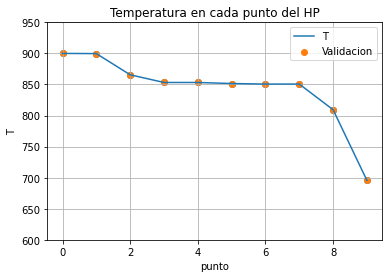

In [179]:
plt.plot(T_test,label= "T")
plt.scatter(np.arange(np.size(T_test)),T_test)
plt.scatter(np.arange(np.size(T_test)),T_validacion,label='Validacion')
plt.ylim(600,950)
plt.xlabel('punto')
plt.ylabel('T')
plt.title('Temperatura en cada punto del HP')
plt.legend()
plt.grid()
plt.show()

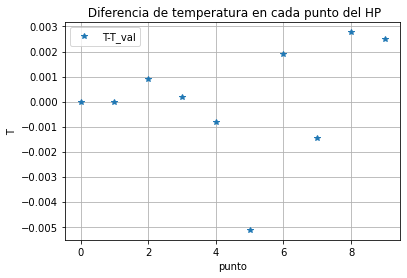

In [186]:
plt.plot(T_test-T_validacion,'*',label= "T-T_val")
#plt.ylim(600,950)
plt.xlabel('punto')
plt.ylabel('T')
plt.title(' Diferencia de temperatura en cada punto del HP')
plt.legend()
plt.grid()
plt.show()

In [200]:
def R_HP(Dwall,Dwick,Dvapor,Le,La,Lc,Kwall,Kwick,Kvapor):
    
    R12=np.log(Dwall/Dwick)/(2*np.pi*Kwall*Le)
    R23=np.log(Dwick/Dvapor)/(2*np.pi*Kwick*Le)
    R78=np.log(Dwick/Dvapor)/(2*np.pi*Kwick*Lc)
    R89=np.log(Dwall/Dwick)/(2*np.pi*Kwall*Lc)
    
    A34=np.pi*Dvapor*Le # surface area between the wick and the vapor core in the evaporator region
    Avapor=np.pi*Dvapor**2/4 # cros-section area of the vapor core
    A67=np.pi*Dvapor*Lc # surface area between the wick and the vapor core in the condenser region
    R34=Dvapor/(2*A34*Kvapor)
    R45=(Le+La)/(2*Avapor*Kvapor)
    R56=(La+Lc)/(2*Avapor*Kvapor)
    R67=Dvapor/(2*A67*Kvapor)
    Req=R12+R23+R34+R45+R56+R67+R78+R89+R89
    return Req

# Resolucion sistema completo

## cosas que le falta agregar

* Variacion de las propiedades de los materiales/fluido con la temperatura
* Chequeo interno del Q en cada HP, ver que no sobrepase ningun limite ($Q_{sonico},Q_{capilar}$,etc)
* Ver si es necesario variar $\epsilon$ en cada punto de la placa radiadora 
* Muchas cosas mas que todavia no identifico
 

In [97]:
N=100
x_span = (0,1) # esta adimensional
x= np.linspace(*x_span, N)

### Fluido 

In [211]:
# aca hay que pulir bastante
#Lx=0.1 # largo del fin radiador
#Lcontacto= Dwall+Lx # a primer orden, seguro va a ser mas grande que esto
#AfHP=np.pi*Dwall*Lcontacto
hfHP=1e6 # aproximado de libro NaK
AfHP=63.12e3/(900-899.71)/hfHP # este se usa para validar
R_fHP=1/(hfHP*AfHP) # resistencia entre el fluido y el HP zona evaporador
R_fHP

4.594423320658486e-06

### fluido a refrigerar: NaK (releer propiedades del paper que mando pablo)

In [43]:
M=6 #kg/s # sacado del paper "Performance analysis and optimization of heat pipe-based radiator for space nuclear power system"
Cp=982  #J/Kg/K # propiedades de NaK sacadas de wikipedia
MCp=M*Cp 

### Heat Pipe

In [208]:

## Heat pipe geometry ##
Dwall=0.07 # external radius (m)
Dwick=0.065 # wick radius (m)
Dvapor=0.06 # vapor radius (m)


Le=0.3 # evaporator length (m)
La=0.2 # adiabatic length (m)  # estos son para caso "real
Lc=0.8 # condenser length (m)


## Heat pipe materials properties ##
Kwall=21.82 # wall thermal conductivity (W/m.K)
Kvapor=1e7 

## Heat pipe wick materials properties ##
Kl=66.98 # thermal conductivity of liquid phase
Ks=21.82 # thermal conductivity of solid phase
phi=0.8 # porosity

Kwick=Kl*Ks/(phi*Ks+(1-phi)*Kl) #asi se calcula bien 
Kwick

47.3714378322313

In [210]:
Req=R_HP(Dwall,Dwick,Dvapor,Le,La,Lc,Kwall,Kwick,Kvapor)
Req

0.0044123230988427735

### Fin radiator

In [213]:
##constantes sacadas de  Lightweight High-Temperature Radiator for In-Space Nuclear-Elect
k = 800 # conductividad del carbono W/(m-K)
stefanBoltz = 5.670373e-8 # constante de Stefan-Boltzmann  W/(m^2-K^4)
emiss = .85 # emisividad
Lz=0.4e-3 # asumo fijo, tomo un valor que parece estandar segun los papers
rho=2000 # kg/m3
T_inf=200 # space temperature

In [214]:
# constantes, no tan constantes
Lx=0.1
Ly=Lc # igual a largo zona condensador HP
Axy=Lx*Ly

In [215]:
print(f"Req={Req:.4};R_fHP={R_fHP:.4}")

Req=0.004412;R_fHP=4.594e-06


### Dado que hay que iterar, para lograr la convergencia hay que hacer un "amortiguamiento" o "numerical damping" como hace OpenFoam  (fue lo primero que se me ocurrio)

$T_{n+1}=\gamma T_{n-1}+(1-\gamma)T_{n}$

In [216]:
damping=0.85

In [239]:
N_HP=200 # numero de HP en serie es del orden de 2000
x_HP=np.arange(N_HP)

In [240]:
Tf_vec=np.zeros(N_HP)
Q_vec=np.zeros(N_HP)
T_cond_vec=np.zeros(N_HP)

In [241]:
## esto es un tanteador de semilla y damping
'''
for i in range(20):
    o_infi=T_inf/T_cond
    o_infi4=o_infi**4
    alphai=a(Lx,T_cond)
    Q=solve_radiator(T_cond)
    print (f"T_cond={T_cond};Q={Q};i={i}")
    T_condi= Tf-Q*(Req+R_fHP)
    T_cond=damping*T_cond+(1-damping)*T_condi
'''    

'\nfor i in range(20):\n    o_infi=T_inf/T_cond\n    o_infi4=o_infi**4\n    alphai=a(Lx,T_cond)\n    Q=solve_radiator(T_cond)\n    print (f"T_cond={T_cond};Q={Q};i={i}")\n    T_condi= Tf-Q*(Req+R_fHP)\n    T_cond=damping*T_cond+(1-damping)*T_condi\n'

In [242]:
Tf=900 
T_cond=890
o_infi=T_inf/T_cond
o_infi4=o_infi**4
alphai=a(Lx,T_cond)

In [243]:
tol=1e-2
ii=1
i=1
for i_HP in range(N_HP):
    while ii>tol:
        o_infi=T_inf/T_cond
        o_infi4=o_infi**4
        alphai=a(Lx,T_cond)
        Q=solve_radiator(T_cond)
        T_condi= Tf-Q*(Req+R_fHP)
        T_cond2=damping*T_cond+(1-damping)*T_condi
        ii=np.abs((T_cond2-T_cond)) 
        T_cond=T_cond2
        i=i+1
    Tf= Tf-Q/MCp
    Tf_vec[i_HP]=Tf
    Q_vec[i_HP]=Q
    T_cond_vec[i_HP]=T_cond
    print (f"T_cond={T_cond};Q={Q};Tf={Tf};HP numero={i_HP+1}")
    ii=1
    i=1
    

T_cond=894.3356582758393;Q=1270.9515496379245;Tf=899.7842919976854;HP numero=1
T_cond=894.2249396882926;Q=1270.211117699685;Tf=899.5687096627058;HP numero=2
T_cond=894.0152588566723;Q=1268.5371530942757;Tf=899.3534114357719;HP numero=3
T_cond=893.7867647350917;Q=1271.449181886036;Tf=899.1376189744879;HP numero=4
T_cond=893.578354883784;Q=1269.784538676442;Tf=898.9221090392067;HP numero=5
T_cond=893.3701378162426;Q=1268.123670650137;Tf=898.7068809891982;HP numero=6
T_cond=893.162170225246;Q=1266.467102668876;Tf=898.4919340946516;HP numero=7
T_cond=892.9544620661751;Q=1264.8149169708793;Tf=898.2772676117984;HP numero=8
T_cond=892.7470146394302;Q=1263.1671140072824;Tf=898.0628807967937;HP numero=9
T_cond=892.5270299745383;Q=1266.142382140835;Tf=897.847989014353;HP numero=10
T_cond=892.3135569003479;Q=1264.4351050371552;Tf=897.6333869938103;HP numero=11
T_cond=892.1050959815177;Q=1262.7770178632443;Tf=897.4190663865694;HP numero=12
T_cond=891.8977758464396;Q=1261.13158988567;Tf=897.2050250

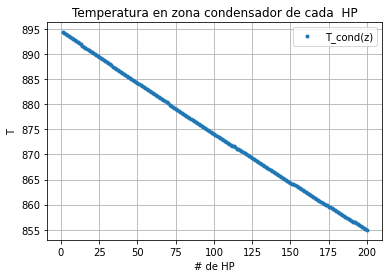

In [245]:
plt.plot(x_HP+1,T_cond_vec,'.',label= "T_cond(z)")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=T_inf/T_cond[j-1], xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(-1,1.1)
#plt.ylim(-1.,1)
plt.xlabel('# de HP')
plt.ylabel('T')
plt.title('Temperatura en zona condensador de cada  HP')
plt.legend()
plt.grid()
plt.show()

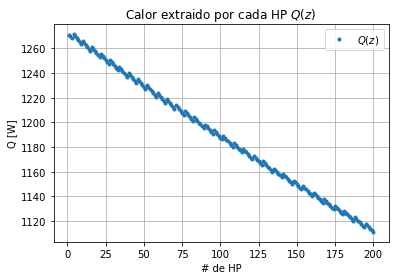

In [246]:
plt.plot(x_HP+1,Q_vec,'.',label= "$Q(z)$")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=T_inf/T_cond[j-1], xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(-1,1.1)
#plt.ylim(-1.,1)
plt.xlabel('# de HP')
plt.ylabel('Q [W]')
plt.title('Calor extraido por cada HP $Q(z)$')
plt.legend()
plt.grid()
#plt.savefig('resultados_modelo/Q.png',dpi=1000)
plt.show()

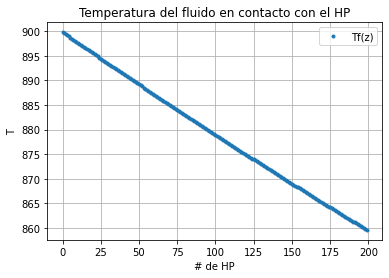

In [247]:
plt.plot(x_HP,Tf_vec,'.',label= "Tf(z)")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=T_inf/T_cond[j-1], xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(-1,1.1)
#plt.ylim(-1.,1)
plt.xlabel('# de HP')
plt.ylabel('T')
plt.title('Temperatura del fluido en contacto con el HP')

plt.legend()
plt.grid()
plt.show()

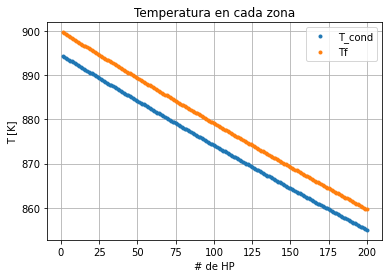

In [248]:
plt.plot(x_HP+1,T_cond_vec,'.',label= "T_cond")
plt.plot(x_HP+1,Tf_vec,'.',label= "Tf")
#plt.plot(z,f1,'.',label= "o1(y)")
#plt.axhline(color="red",y=T_inf/T_cond[j-1], xmin=0, xmax=1,label="$T^*_{inf}$")
#plt.xlim(-1,1.1)
#plt.ylim(-1.,1)
plt.xlabel('# de HP')
plt.ylabel('T [K]')
plt.title('Temperatura en cada zona')
plt.legend()
plt.grid()
#plt.savefig('resultados_modelo/temperatura.png',dpi=1000)
plt.show()

In [235]:
900-Tf_vec[N_HP-1] # lo que bajo la temperatura del fluido

10.61349802720008

In [238]:
np.sum(Q_vec)/1000 # Calor extraido en N_HP HP [kW]

62.53473037626234